In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from proc_revisions.utils import *
from proc_revisions.plotting import *

In [2]:
od = '../../proc_revisions/'
config_file = f'{od}/config.yml'
with open(config_file) as f:
    config = yaml.safe_load(f)

In [3]:
ab = od+expand(config['lr']['talon']['fusion_fix']['ab'], species='human')[0]
filt_ab = od+expand(config['lr']['cerberus']['filt_ab'], species='human')[0]
read_annot = od+expand(config['lr']['talon']['full_annot'], species='human')[0]
t_metadata = od+expand(config['ref']['cerberus']['new_gtf_t_info'], species='human')[0]
lib_meta = od+expand(config['lr']['meta'], species='human')[0]
swan_file = od+expand(config['lr']['swan']['sg'], species='human')[0]
cerberus_h5 = od+expand(config['lr']['cerberus']['ca_triplets'], species='human', obs_col='sample')[0]
cerb_t_metadata = od+expand(config['lr']['cerberus']['gtf_t_info'], species='human')[0]
major_isos = od+expand(config['lr']['analysis']['major_isos'], species='human', obs_col='sample')[0]
pi_tpm_table = od+expand(config['lr']['mane']['pi_tpm']['triplet'], species='human', obs_col='sample')[0]
pp_summary = od+expand(config['lr']['protein_pred']['summary'], species='human')[0]

ref_t_metadata = od+expand(config['ref']['new_gtf_t_info'], species='human')[0]
ref_g_metadata = od+expand(config['ref']['new_gtf_g_info'], species='human')[0]


ver = 'v40_cerberus'
min_tpm = 1
gene_subset = 'polya'
obs_col = 'sample'
go_gene_subset = 'protein_coding'
predom_iso_subset = 'protein_coding'

m_lib_meta = od+expand(config['lr']['meta'], species='mouse')[0]

# Figure 2

## Novelty and support of detected triplet features

tss
Support sources:['encode_cage', 'fantom_cage', 'encode_rampage', 'gtex', 'pls', 'encode_procap', 'lrgasp_cage', 'pol2', 'ca_h3k4me3']
Calculating tss TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2087: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2086: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tsss detected: 73812
# tsss >= 1 tpm: 64913
Applying gene type and novelty subset
Number of tsss reported: 61664
156184
61664
     support  counts
0      Known   52766
1      Novel    1508
2  Supported    7390
   support_2  counts
0      Novel   12216
1  Supported   49448
14.43% (8898/61664) of tsss are novel
83.05% (7390/8898) of novel tsss are supported
2.45% (1508/61664) of tsss are novel and not supported by orthogonal data
80.19% (49448/61664) of tsss are supported by orthogonal data, regardless of novelty

ic
Support sources:['gtex']
Calculating ic TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2087: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2086: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # ics detected: 145392
# ics >= 1 tpm: 131409
Applying gene type and novelty subset
Number of ics reported: 128159
357068
128159
     support  counts
0      Known   82555
1      Novel   36792
2  Supported    8812
   support_2  counts
0      Novel   98109
1  Supported   30050
35.58% (45604/128159) of ics are novel
19.32% (8812/45604) of novel ics are supported
28.71% (36792/128159) of ics are novel and not supported by orthogonal data
23.45% (30050/128159) of ics are supported by orthogonal data, regardless of novelty

tes
Support sources:['pas', 'polya_atlas', 'gtex']
Calculating tes TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2087: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2086: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tess detected: 87189
# tess >= 1 tpm: 76035
Applying gene type and novelty subset
Number of tess reported: 72806
187005
72806
     support  counts
0      Known   56756
1      Novel    2740
2  Supported   13310
   support_2  counts
0      Novel   23712
1  Supported   49094
22.04% (16050/72806) of tess are novel
82.93% (13310/16050) of novel tess are supported
3.76% (2740/72806) of tess are novel and not supported by orthogonal data
67.43% (49094/72806) of tess are supported by orthogonal data, regardless of novelty



<Figure size 216x1440 with 0 Axes>

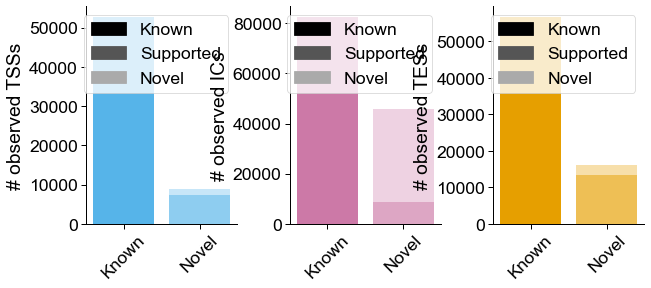

In [4]:
plot_novel_supported_triplet_feats(filt_ab,
                                   cerberus_h5,
                                   gene_subset,
                                   min_tpm,
                                   'figures/triplet_feature_novelty_support.pdf')

## Number of detected triplet features per gene

Calculating tss TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2087: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2086: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tsss detected: 73812
# tsss >= 1 tpm: 64913
Applying gene type and novelty subset
Number of tsss reported: 61664
Calculating ic TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # ics detected: 145392
# ics >= 1 tpm: 131409
Applying gene type and novelty subset
Number of ics reported: 128159
Calculating tes TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # tess detected: 87189
# tess >= 1 tpm: 76035
Applying gene type and novelty subset
Number of tess reported: 72806


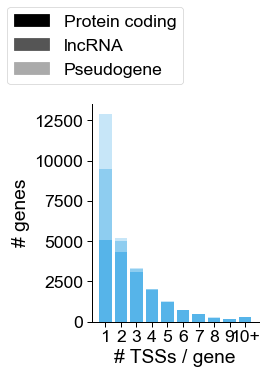

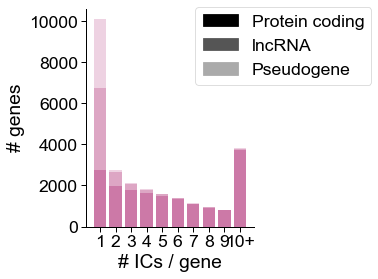

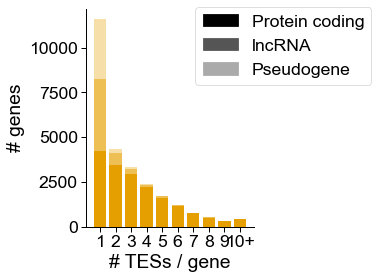

In [5]:
dfs = plot_triplet_feats_per_gene(cerberus_h5,
                                filt_ab,
                                gene_subset,
                                min_tpm,
                                opref='figures/triplet_feat_per_gene_')

In [6]:
# what percentage of polya genes have more than one triplet feature / gene? 
for feat in ['tss', 'ic', 'tes']:
    df = dfs[feat]
    df['total'] = df[['lncRNA', 'protein_coding', 'pseudogene']].sum(axis=1)
    col = f'n_{feat}'
    print(col)
    df['one_feat'] = (df[col] == '1')
    temp = df[['total', 'one_feat']].groupby('one_feat').sum().reset_index()
    
    n = temp.total.sum(axis=0)
    n_num = temp.loc[temp.one_feat==False, 'total'].values[0]
    print(f'{(n_num/n)*100:.2f}% ({n_num}/{n}) of polyA genes have >1 {feat}')

n_tss
51.53% (13683.0/26556.0) of polyA genes have >1 tss
n_ic
61.96% (16447/26546) of polyA genes have >1 ic
n_tes
56.37% (14967/26552) of polyA genes have >1 tes


## Detection of transcripts with known ICs by biotype


Calculating iso TPM values
Getting ['Known'] ics
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 236615
# isos >= 1 tpm: 213476
Applying gene type and novelty subset
Number of isos reported: 136313
Detected 136313 transcripts >= 1 TPM w/ a known ic


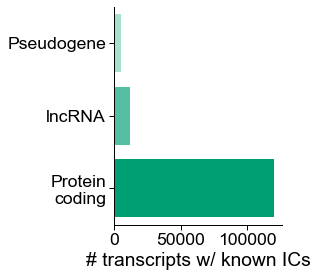

In [7]:
plot_transcript_det_by_biotype(filt_ab,
                               cerberus_h5,
                               min_tpm, 
                               gene_subset, 
                               ['Known'],
                               'human',
                               'figures/transcript_det_by_biotype.pdf')

## Transcript detection by novelty of each triplet feature

Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2087: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2086: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 236615
# isos >= 1 tpm: 213476
Applying gene type and novelty subset
Number of isos reported: 209819
51.76% (108601/209819) transcripts have all known triplet features


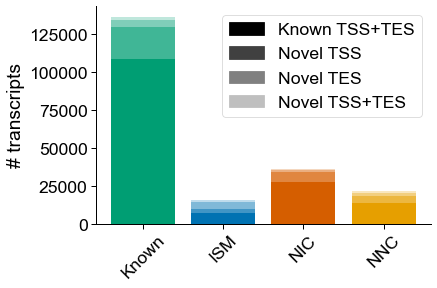

In [8]:
df = plot_transcripts_by_triplet_feat_novelty(filt_ab,
                                         cerberus_h5,
                                         min_tpm, 
                                         gene_subset,
                                         'human',
                                         'figures/transcripts_by_triplet_feature_novelty.pdf')

## # Isoforms detected per gene by biotype

Calculating iso TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 236615
# isos >= 1 tpm: 213476
Applying gene type and novelty subset
Number of isos reported: 209819
figures//isos_per_gene_support.png


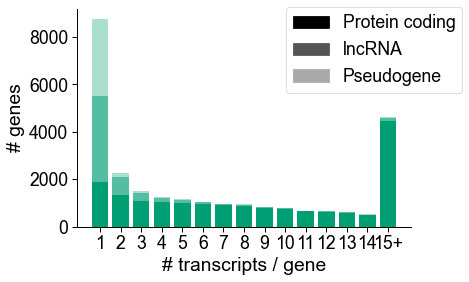

In [14]:
df = pd.read_csv(filt_ab, sep='\t')
_, ids = get_tpm_table(df,
               how='iso',
               min_tpm=min_tpm,
               gene_subset=gene_subset,
               species='human')
df = plot_n_isos_per_gene(df,
                     show_pc=True,
                     subset=ids,
                     max_isos=15, opref='figures/')

In [10]:
# what percentage of polya genes have more than one transcript feature / gene? 
df['total'] = df[['lncRNA', 'protein_coding', 'pseudogene']].sum(axis=1)
df['one_feat'] = (df['n_iso'] == '1')
temp = df[['total', 'one_feat']].groupby('one_feat').sum().reset_index()

n = temp.total.sum(axis=0)
n_num = temp.loc[temp.one_feat==False, 'total'].values[0]
print(f'{(n_num/n)*100:.2f}% ({n_num}/{n}) of polyA genes have >1 transcript')

67.07% (17804/26544) of polyA genes have >1 transcript


In [17]:
# what percentage of protein coding genes have more than one transcript feature / gene? 
df['total'] = df[['protein_coding']].sum(axis=1)
df['one_feat'] = (df['n_iso'] == '1')
temp = df[['total', 'one_feat']].groupby('one_feat').sum().reset_index()

n = temp.total.sum(axis=0)
n_num = temp.loc[temp.one_feat==False, 'total'].values[0]
print(f'{(n_num/n)*100:.2f}% ({n_num}/{n}) of protein coding genes have >1 transcript')

89.12% (15537/17433) of protein coding genes have >1 transcript


## Browser plots for genes expressed > 500 TPM

Read in graph from ../../proc_revisions/data/human/lr/swan/swan_graph.p
Calculating iso TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 236615
# isos >= 1 tpm: 213476
Applying gene type and novelty subset
Number of isos reported: 209819
Found 51 total samples


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/plotting.py:1894: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


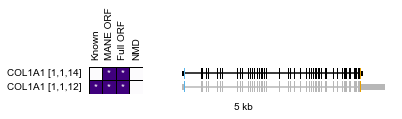

In [6]:
_ = plot_browser_isos_2(cerberus_h5,
                        swan_file,
                        filt_ab,
                        pp_summary,
                        major_isos,
                        'COL1A1',
                        obs_col,
                        'ovary',
                        'figures/col1a1_ovary_browser_isos.pdf')

Read in graph from ../../proc_revisions/data/human/lr/swan/swan_graph.p
Calculating iso TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 236615
# isos >= 1 tpm: 213476
Applying gene type and novelty subset
Number of isos reported: 209819
Found 51 total samples


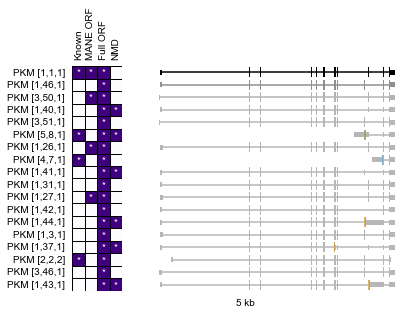

In [7]:
_ = plot_browser_isos_2(cerberus_h5,
                        swan_file,
                        filt_ab,
                        pp_summary,
                        major_isos,
                        'PKM',
                        obs_col,
                        'ovary',
                        'figures/pkm_ovary_browser_isos.pdf')

low pi and low tpm
12.01% (1821/15167) of protein coding genes in ovary have pi < 50 and tpm < 20

low pi and high tpm
1.86% (282/15167) of protein coding genes in ovary have pi < 50 and tpm > 100

high pi and low tpm
21.87% (3317/15167) of protein coding genes in ovary have pi > 90 and tpm < 20

high pi and high tpm
2.78% (421/15167) of protein coding genes in ovary have pi > 90 and tpm > 100

18.54% (282/1521) of protein coding genes >100 tpm in ovary have pi < 50

27.68% (421/1521) of protein coding genes >100 tpm in ovary have pi > 90



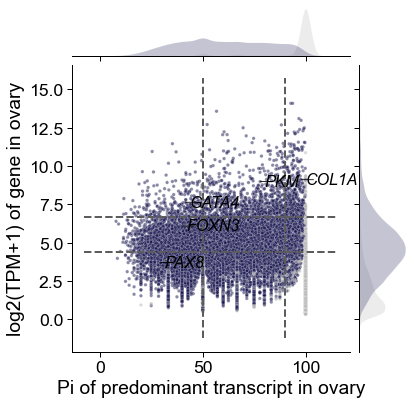

In [13]:
plot_gene_tpm_v_predom_t_pi(cerberus_h5,
                                major_isos,
                                'sample_det',
                                obs_col,
                                'ovary',
                                gene_subset,
                                'figures/gee_.pdf',
                                label_genes=['PKM', 'COL1A1', 'FOXN3', 'GATA4', 'PAX8'])

## # predominant isoforms / gene

Calculating iso TPM values
Subsetting for protein_coding genes
Enforcing minimum TPM
Total # isos detected: 236615
# isos >= 1 tpm: 213476
Applying gene type and novelty subset
Number of isos reported: 191325
Found 51 total samples
721205
559167
Median predominant transcripts / gene: 2.0
17433
12357
12357/17433 70.88% protein-coding genes have >1 predominant isoforms across samples


<Figure size 216x360 with 0 Axes>

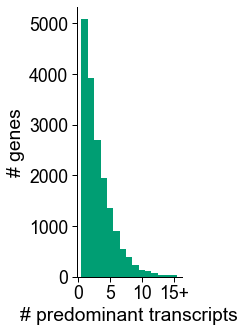

In [8]:
fname = 'figures/predom_isos_per_gene.pdf'
_, df = plot_n_predom_transcripts(pi_tpm_table,
                          filt_ab,
                          ver,
                          predom_iso_subset,
                          min_tpm,
                          fname,
                          max_isos=15,
                          figsize=(3,5))

Calculating iso TPM values
Subsetting for protein_coding genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2087: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2086: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 236615
# isos >= 1 tpm: 213476
Applying gene type and novelty subset
Number of isos reported: 191325
Found 51 total samples
721205
559167
Median predominant transcripts / gene: 2.0
17433
12357
12357/17433 70.88% protein-coding genes have >1 predominant isoforms across samples


<Figure size 216x360 with 0 Axes>

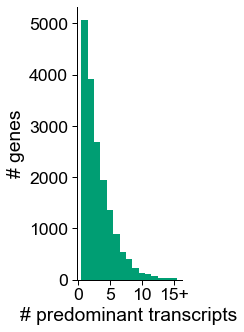

In [15]:
fname = 'figures/predom_isos_per_gene.pdf'
_, df = plot_n_predom_transcripts(pi_tpm_table,
                          filt_ab,
                          ver,
                          predom_iso_subset,
                          min_tpm,
                          fname,
                          max_isos=15,
                          figsize=(3,5))

In [16]:
# what % of genes have just 1 or 2 predominant isoforms?
df['2_iso'] = df.n_predom_ts <= 2
temp = df[['gid', '2_iso']].groupby('2_iso').count().reset_index()
n = temp['gid'].sum()
n_num = temp.loc[temp['2_iso']==True, 'gid'].values[0]
print(f'{(n_num/n)*100:.2f}% of protein coding genes ({n_num}/{n}) have <=2 predominant isoforms')

51.61% of protein coding genes (8997/17433) have <=2 predominant isoforms


## Number of isoforms detected

In [17]:
df = pd.read_csv(filt_ab, sep='\t')
df, tids = get_tpm_table(df,
               how='iso',
               min_tpm=min_tpm,
               gene_subset=gene_subset)

Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2087: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2086: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 236615
# isos >= 1 tpm: 213476
Applying gene type and novelty subset
Number of isos reported: 209819


In [18]:
print(f'Number of {gene_subset} isoforms detected >= {min_tpm} in >= 1 library: {len(tids)}')

Number of polya isoforms detected >= 1 in >= 1 library: 209819


## Number of isoforms with novel ICs detected

In [19]:
df = df.reset_index()
feat = 'ic'
df = add_feat(df, col='annot_transcript_id', kind=feat)
feat_df = get_ca_table(cerberus_h5, feat)
feat_df = feat_df[['Name', 'novelty']]
feat_df.rename({'novelty': '{}_novelty'.format(feat),
                'Name': feat}, axis=1, inplace=True)
df = df.merge(feat_df, how='left', on=feat)

In [20]:
df = df[['annot_transcript_id', 'ic_novelty']].groupby(['ic_novelty']).count().reset_index()
n_novel = df.loc[df.ic_novelty!='Known'].sum().loc['annot_transcript_id']

In [21]:
novel_tids = [t for t in tids if 'ENCODE' in t]
print(f'Number of {gene_subset} isoforms with novel ICs detected >= {min_tpm} in >= 1 library: {n_novel}')

Number of polya isoforms with novel ICs detected >= 1 in >= 1 library: 73506


In [10]:
n_num = 73506
n = 209819
print(f'{n_num}/{n} {(n_num/n)*100:.2f}% of detected transcripts from {gene_subset} genes have novel ECs')

73506/209819 35.03% of detected transcripts from polya genes have novel ECs


In [22]:
# n = len(df.loc[df.ic_novelty!='Known', 'ic'].unique().tolist())
# print(f'Number of novel ICs detected >= {min_tpm} in >= 1 library: {n}')        

## % of genes w/ more than one isoform detected

In [23]:
df = pd.read_csv(filt_ab, sep='\t')
df = get_det_table(df,
               how='iso',
               min_tpm=min_tpm,
               gene_subset=gene_subset)
df = df.transpose()
df = df.reset_index()
df = df[['annot_transcript_id']]
df['gid'] = df.annot_transcript_id.str.split('[', expand=True)[0]
gene_df, _, _ = get_gtf_info(how='gene', ver='v40_cerberus')
gene_df['gid_stable'] = cerberus.get_stable_gid(gene_df, 'gid')
print(len(df.index))
df = df.merge(gene_df, how='left',left_on='gid', right_on='gid_stable')
print(len(df.index))
temp1 = df[['annot_transcript_id', 'gid_stable', 'biotype_category']].groupby(['gid_stable', 'biotype_category']).nunique().reset_index()
temp1.rename({'annot_transcript_id': 'n_isos'}, axis=1, inplace=True)
temp1['one_iso'] = temp1.n_isos == 1
temp1 = temp1[['biotype_category', 'one_iso', 'gid_stable']].groupby(['one_iso', 'biotype_category']).nunique().reset_index()
temp1.rename({'gid_stable':'n_genes'}, axis=1, inplace=True)
temp2 = df[['gid_stable', 'biotype_category']].groupby(['biotype_category']).nunique().reset_index()
temp2.rename({'gid_stable': 'n_genes'}, axis=1, inplace=True)
temp1 = temp1.merge(temp2, how='left', on='biotype_category', suffixes=('', '_total'))
temp1['perc'] = (temp1.n_genes/temp1.n_genes_total)*100
temp1

Calculating iso TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 236615
# isos >= 1 tpm: 213476
Applying gene type and novelty subset
Number of isos reported: 209819
Found 138 total libraries
209819
209819


,one_iso,biotype_category,n_genes,n_genes_total,perc
0,False,lncRNA,1819,5428,33.511422
1,False,protein_coding,15537,17433,89.124075
2,False,pseudogene,448,3683,12.163997
3,True,lncRNA,3609,5428,66.488578
4,True,protein_coding,1896,17433,10.875925
5,True,pseudogene,3235,3683,87.836003


## Length of COL1A1 transcripts

In [23]:
temp2 = pd.read_csv(cerb_t_metadata, sep='\t')
temp2.loc[temp2.gname=='COL1A1']

,tid,t_len,gid,gname,biotype,biotype_category,readthrough_transcript,MANE_Select,MANE_Plus_Clinical,tf
51508,"ENSG00000108821[1,1,12]",6878,ENSG00000108821.13,COL1A1,protein_coding,protein_coding,False,False,False,False
51509,"ENSG00000108821[1,1,13]",5494,ENSG00000108821.13,COL1A1,protein_coding,protein_coding,False,False,False,False
51510,"ENSG00000108821[1,1,14]",4929,ENSG00000108821.13,COL1A1,protein_coding,protein_coding,False,False,False,False
51511,"ENSG00000108821[1,1,1]",6066,ENSG00000108821.13,COL1A1,protein_coding,protein_coding,False,False,False,False
51512,"ENSG00000108821[1,15,14]",5057,ENSG00000108821.13,COL1A1,protein_coding,protein_coding,NaN,False,False,False
51513,"ENSG00000108821[13,14,1]",200,ENSG00000108821.13,COL1A1,protein_coding,protein_coding,NaN,False,False,False
51514,"ENSG00000108821[14,14,1]",587,ENSG00000108821.13,COL1A1,protein_coding,protein_coding,NaN,False,False,False
51515,"ENSG00000108821[15,14,1]",1194,ENSG00000108821.13,COL1A1,protein_coding,protein_coding,NaN,False,False,False
51516,"ENSG00000108821[2,2,2]",1249,ENSG00000108821.13,COL1A1,protein_coding,protein_coding,NaN,False,False,False
51517,"ENSG00000108821[7,7,6]",709,ENSG00000108821.13,COL1A1,protein_coding,protein_coding,NaN,False,False,False


## Expression levels of PKM and COL1A1 genes in ovary


In [2]:
df = pd.read_csv(ab, sep='\t')
df, gids = get_tpm_table(df,
               how='gene',
               min_tpm=min_tpm,
               gene_subset=gene_subset, 
               groupby='sample')

Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2087: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2086: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # genes detected: 564934
# genes >= 1 tpm: 276567
Applying gene type and novelty subset
Averaging over biosample
Found 51 total samples
Number of genes reported: 34905


In [5]:
df.loc[['ENSG00000108821', 'ENSG00000067225'], 'ovary']

ENSG00000108821    550.600226
ENSG00000067225    505.994941
Name: ovary, dtype: float64

## # exons in PKM and COL1A1

In [6]:
gnames = ['PKM', 'COL1A1']
sg = swan.read(swan_file)

# get list of all the transcripts expressed
df = pd.read_csv(filt_ab, sep='\t')
df, tids = get_tpm_table(df,
               how='iso',
               min_tpm=min_tpm,
               gene_subset=gene_subset, 
               groupby=obs_col)

# get just the transcripts that are from the genes we care about
t_df = sg.t_df.loc[sg.t_df.gname.isin(gnames)].copy(deep=True)

# just get the expressed transcripts
t_df = t_df.loc[t_df.tid.isin(tids)]

# string representation of exons
t_df['temp_path'] = t_df.path.str.join('-')
t_df[['temp_path', 'path']].head()

# get unique edges / gene
e_df = swan.pivot_path_list(t_df, 'path')
e_df = e_df.merge(t_df[['gname']], left_index=True, right_index=True)
e_df.reset_index(drop=True, inplace=True)
e_df = e_df.drop_duplicates()

# only exons
e_df = e_df.merge(sg.edge_df[['edge_type']], left_on='edge_id', right_index=True)
e_df = e_df.loc[e_df.edge_type=='exon']

for g in gnames:
    temp = e_df.loc[e_df.gname==g]
    n = len(temp.edge_id.unique().tolist())
    print(f'{n} unique exons are in {g}')

Read in graph from ../../proc_revisions/data/human/lr/swan/swan_graph.p
Calculating iso TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 236615
# isos >= 1 tpm: 213476
Applying gene type and novelty subset
Averaging over biosample
Found 51 total samples
Number of isos reported: 209819
47 unique exons are in PKM
59 unique exons are in COL1A1


# Figure S5

## Upset plots for detected triplet features

Calculating tss TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # tsss detected: 73812
# tsss >= 1 tpm: 64913
Applying gene type and novelty subset
Number of tsss reported: 61664
tss
{'GENCODE': ['v29', 'v40'], 'CAGE, RAMPAGE, ProCap, GTEx': ['encode_cage', 'encode_rampage', 'fantom_cage', 'lrgasp_cage', 'encode_procap', 'gtex'], 'PLS cCREs': ['pls'], 'pELS, dELS, CA-H3K4me3 cCREs': ['pels', 'dels', 'ca_h3k4me3'], 'PolII ChIP-seq': ['pol2']}
Calculating ic TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # ics detected: 145392
# ics >= 1 tpm: 131409
Applying gene type and novelty subset
Number of ics reported: 128159
ic
{'GENCODE': ['v29', 'v40'], 'GTEx': ['gtex']}
Calculating tes TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # tess detected: 87189
# tess >= 1 tpm: 76035
Applying gene type and novelty subset
Number of tess reported: 72806
tes
{'GENCODE': ['v29', 'v40'], 'PAS-seq, PolyA Atlas': ['pas', 'polya_atlas'], 'GTEx': ['gtex

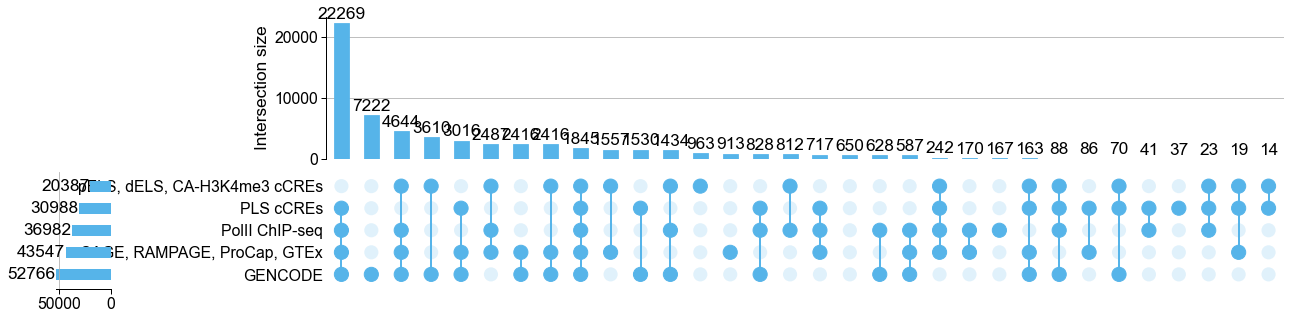

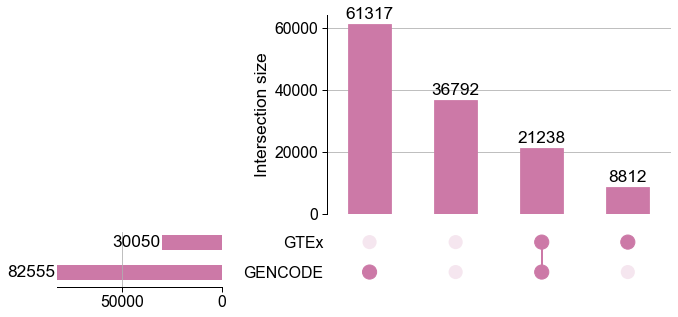

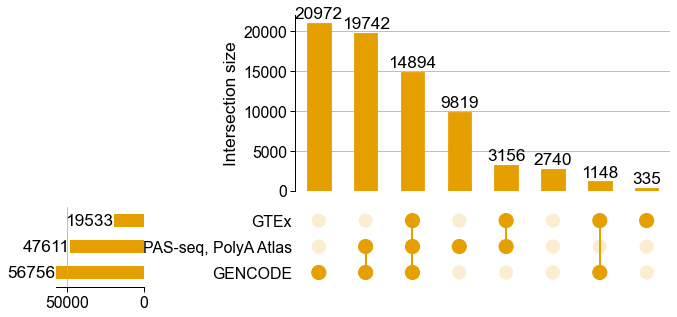

In [8]:
for feat in ['tss', 'ic', 'tes']:
    fname = f'figures/{feat}_upset.pdf'
    make_triplet_feat_upset(cerberus_h5,
                            filt_ab,
                            feat,
                            gene_subset,
                            min_tpm,
                            fname)

## Lengths of TSSs and TESs

Calculating tss TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # tsss detected: 73812
# tsss >= 1 tpm: 64913
Applying gene type and novelty subset
Number of tsss reported: 61664
101
99.76% of regions (61515/61664) are b/w 0 and 500 bp long
5.11% of regions (3152/61664) are b/w 250 and 1264 bp long
Calculating tes TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2087: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2086: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tess detected: 87189
# tess >= 1 tpm: 76035
Applying gene type and novelty subset
Number of tess reported: 72806
101
99.79% of regions (72650/72806) are b/w 0 and 500 bp long
3.49% of regions (2542/72806) are b/w 250 and 1036 bp long


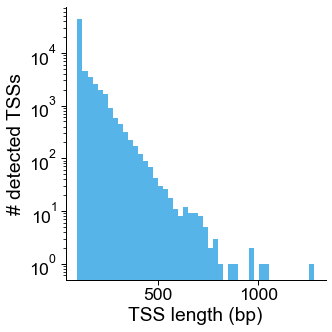

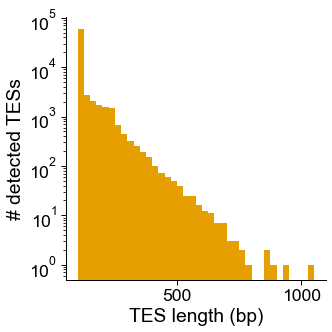

In [9]:
df = plot_feat_len_hist(cerberus_h5,
                   filt_ab,
                   'tss',
                   gene_subset,
                   min_tpm,
                   'figures/tss_len_hist.pdf')

df = plot_feat_len_hist(cerberus_h5,
                   filt_ab,
                   'tes',
                   gene_subset,
                   min_tpm,
                   'figures/tes_len_hist.pdf')

## Intron chains by novelty type


Calculating ic TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2087: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2086: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # ics detected: 145392
# ics >= 1 tpm: 131409
Applying gene type and novelty subset
Number of ics reported: 128159
  novelty  counts
0     ISM   10030
1   Known   82555
2     NIC   21324
3     NNC   14250
Number of complete intron chains: counts    128159
dtype: int64


<Figure size 216x288 with 0 Axes>

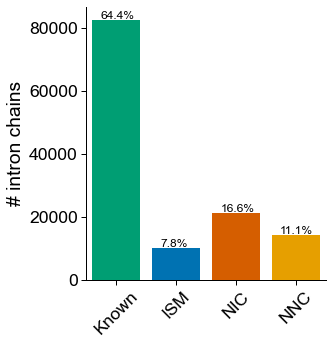

<Figure size 432x288 with 0 Axes>

In [10]:
df = pd.read_csv(filt_ab, sep='\t')
df, ic_ids = get_tpm_table(df,
               how='ic',
               gene_subset=gene_subset,
               min_tpm=min_tpm)
plot_ic_novelty(cerberus_h5, 
                source='lapa', 
                oprefix='figures/human',
                pass_list=ic_ids)

In [11]:
82555/131409

0.628229421120319

In [12]:
21324/131409

0.1622719905029336

In [13]:
14250/131409

0.10844006118302399

# Figure S6

## Transcript detection (known ICs) by sample

Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2087: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2086: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 236615
# isos >= 1 tpm: 213476
Applying gene type and novelty subset
Number of isos reported: 209819
Found 51 total samples
111169 / 209819 (53.0%) transcripts are expressed in <= 8 samples
32830 / 209819 (15.6%) transcripts are expressed in >= 30 samples
90082 / 209819 (42.9%) transcripts are expressed in <= 10% samples
10279 / 209819 (4.9%) transcripts are expressed in >= 90% samples


<Figure size 360x432 with 0 Axes>

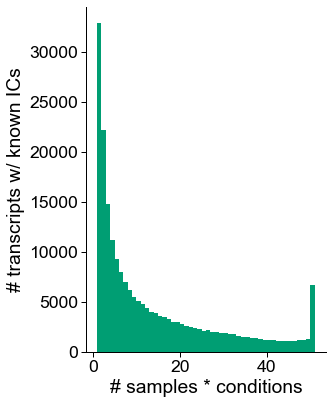

In [11]:
df = pd.read_csv(filt_ab, sep='\t')
df = plot_biosamp_det(df,
                      figsize=(5,6),
                      how='iso',
                      min_tpm=min_tpm,
                      gene_subset=gene_subset,
                      sample=None,
                      groupby=obs_col,
                      ic_nov=['Known'],
                      opref='figures/transcript')

specific_thresh = 8
ubiq_thresh = 30

n_iso = len(df.index)
n_specific = len(df.loc[df.n_samples <= specific_thresh].index)
n_ubiq = len(df.loc[df.n_samples >= ubiq_thresh].index)

print('{} / {} ({:.1f}%) transcripts are expressed in <= {} samples'.format(n_specific, n_iso, (n_specific/n_iso)*100, specific_thresh))
print('{} / {} ({:.1f}%) transcripts are expressed in >= {} samples'.format(n_ubiq, n_iso, (n_ubiq/n_iso)*100, ubiq_thresh))

specific_thresh = 10
ubiq_thresh = 90

n_samples = len(df.columns)
df['perc'] = (df.n_samples/n_samples)*100

n_iso = len(df.index)
n_specific = len(df.loc[df.perc < specific_thresh].index)
n_ubiq = len(df.loc[df.perc > ubiq_thresh].index)

print('{} / {} ({:.1f}%) transcripts are expressed in <= {}% samples'.format(n_specific, n_iso, (n_specific/n_iso)*100, specific_thresh))
print('{} / {} ({:.1f}%) transcripts are expressed in >= {}% samples'.format(n_ubiq, n_iso, (n_ubiq/n_iso)*100, ubiq_thresh))


## Number of isoforms per gene at different biotypes and TPM bins

[(1.0, 10.0], (100.0, 87160.203], (10.0, 100.0], NaN]
Categories (3, interval[float64, right]): [(1.0, 10.0] < (10.0, 100.0] < (100.0, 87160.203]]


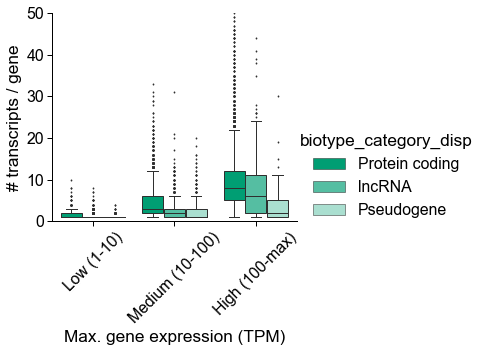

In [18]:
df = plot_exp_v_iso_biotype_boxplot(cerberus_h5,
                                    ver,
                                    'figures/exp_v_iso_biotype_box.pdf')

In [21]:
len(df.loc[(df.gene_tpm>100)&(df.biotype_category=='lncRNA')])

149

In [22]:
len(df.loc[(df.gene_tpm>100)&(df.biotype_category=='protein_coding')])

8450

In [13]:
# get median of each biotype category in highest tpm bin
for b in df.biotype_category.unique():
    m = df.loc[(df.tpm_bin.str.contains('High'))&\
               (df.biotype_category==b)].n_iso.median()
    print(f'Median # isoforms for high tpm {b} genes is {m}')

Median # isoforms for high tpm lncRNA genes is 6.0
Median # isoforms for high tpm protein_coding genes is 8.0
Median # isoforms for high tpm pseudogene genes is 2.0


## # TSSs or TESs detected per IC

Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2087: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2086: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 236615
# isos >= 1 tpm: 213476
Applying gene type and novelty subset
Number of isos reported: 209819
87.38% (106038/121358 of unique ics have 1 tss


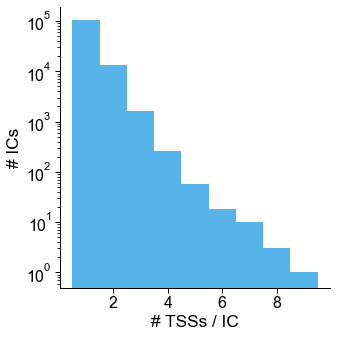

In [14]:
# tss / ic in detected transcripts
ca = cerberus.read(cerberus_h5)
df = pd.read_csv(filt_ab, sep='\t')
df, tids = get_tpm_table(df,
               how='iso',
               min_tpm=min_tpm,
               gene_subset=gene_subset,
               h5=cerberus_h5)
feat = 'tss'
fname = 'figures/tss_per_ic.pdf'

temp = plot_ends_per_ic(df, ca, feat,
                       fname,
                       rm_monoexonic=True)

Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2087: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2086: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 236615
# isos >= 1 tpm: 213476
Applying gene type and novelty subset
Number of isos reported: 209819
70.71% (85818/121358 of unique ics have 1 tes


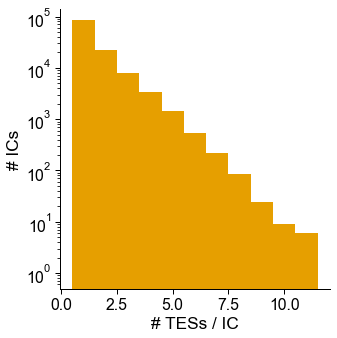

In [15]:
# tes / ic in detected transcripts
df = pd.read_csv(filt_ab, sep='\t')
df, tids = get_tpm_table(df,
               how='iso',
               min_tpm=min_tpm,
               gene_subset=gene_subset,
               h5=cerberus_h5)
feat = 'tes'
fname = 'figures/tes_per_ic.pdf'

temp = plot_ends_per_ic(df, ca, feat,
                       fname,
                       rm_monoexonic=True)

99.72% (216350/216960 of unique ics have 1 tss


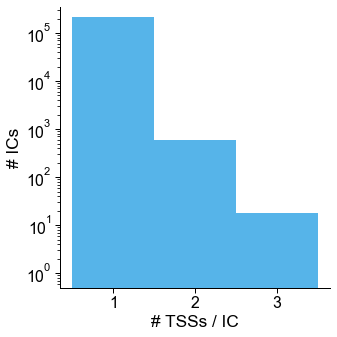

In [16]:
# gencode v40 tss / ic
df = pd.read_csv(t_metadata, sep='\t')

# only polya
polya_cats = ['protein_coding', 'lncRNA', 'pseudogene']
df = df.loc[df.biotype_category.isin(polya_cats)]
df.set_index('tid', inplace=True)

feat = 'tss'
fname = 'figures/v40_tss_per_ic.pdf'

temp = plot_ends_per_ic(df, ca, feat,
                       fname,
                       rm_monoexonic=True)

99.42% (215692/216960 of unique ics have 1 tes


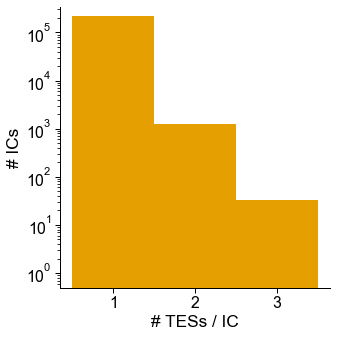

In [17]:
# gencode v40 tes / ic
df = pd.read_csv(t_metadata, sep='\t')

# only polya
polya_cats = ['protein_coding', 'lncRNA', 'pseudogene']
df = df.loc[df.biotype_category.isin(polya_cats)]
df.set_index('tid', inplace=True)

feat = 'tes'
fname = 'figures/v40_tes_per_ic.pdf'

temp = plot_ends_per_ic(df, ca, feat,
                       fname,
                       rm_monoexonic=True)